<a href="https://colab.research.google.com/github/tsenga2/keio-quant-macro/blob/main/HPfilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#提出内容
#①米・英・日・仏・独を対象にする。
#②λごとでHPフィルターはどのように変化するのか可視化する。

In [2]:
#ライブラリのインポート
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np
#期間の設定
# set the start and end dates for the data
start_date = '1955-01-01'
end_date = '2022-01-01'

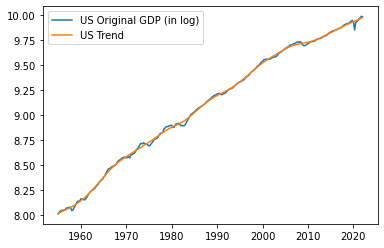

In [3]:
#米国の場合
gdp = web.DataReader('GDPC1', 'fred', start_date, end_date)
log_gdp = np.log(gdp)

# calculate the quarterly percent change in real GDP
gdp_pct_change = gdp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle, trend = sm.tsa.filters.hpfilter(log_gdp, lamb=1600)

# Plot the original time series data
plt.plot(log_gdp, label="US Original GDP (in log)")

# Plot the trend component
plt.plot(trend, label="US Trend")

# Add a legend and show the plot
plt.legend()
plt.show()


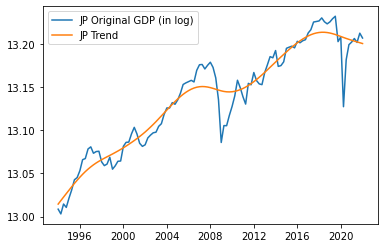

In [4]:
#日本の場合
# 日本のGDPデータを取得するためのFREDコード
japan_gdp_code = 'JPNRGDPEXP'

# 日本のGDPデータをFREDから取得
japan_gdp = web.DataReader(japan_gdp_code, 'fred', start_date, end_date)
log_japan_gdp = np.log(japan_gdp)

# calculate the quarterly percent change in real GDP
japan_gdp_pct_change = japan_gdp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
japan_cycle, japan_trend = sm.tsa.filters.hpfilter(log_japan_gdp, lamb=1600)

# Plot the original time series data
plt.plot(log_japan_gdp, label="JP Original GDP (in log)")

# Plot the trend component
plt.plot(japan_trend, label="JP Trend")

# Add a legend and show the plot
plt.legend()
plt.show()

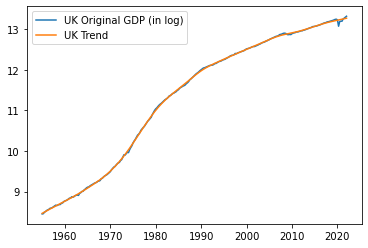

In [5]:
#英国の場合
# イギリスのGDPデータを取得するためのFREDコード
uk_gdp_code = 'UKNGDP'  # または 'UKNGDP' など

# イギリスのGDPデータをFREDから取得
uk_gdp = web.DataReader(uk_gdp_code, 'fred', start_date, end_date)
log_uk_gdp = np.log(uk_gdp)

# calculate the quarterly percent change in real GDP
uk_gdp_pct_change = uk_gdp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
uk_cycle, uk_trend = sm.tsa.filters.hpfilter(log_uk_gdp, lamb=1600)

# Plot the original time series data
plt.plot(log_uk_gdp, label="UK Original GDP (in log)")

# Plot the trend component
plt.plot(uk_trend, label="UK Trend")

# Add a legend and show the plot
plt.legend()
plt.show()

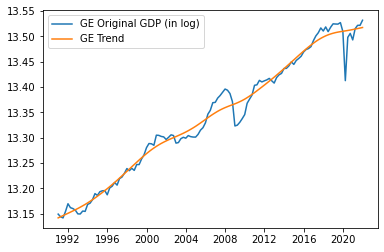

In [6]:
#独国の場合
#ドイツのGDPデータコード
germany_gdp_code = 'CLVMNACSCAB1GQDE'  # ドイツのGDPコード

# ドイツのGDPデータをFREDから取得
germany_gdp = web.DataReader(germany_gdp_code, 'fred', start_date, end_date)
log_germany_gdp = np.log(germany_gdp)

# 四半期毎の実質GDPのパーセンテージ変化を計算
germany_gdp_pct_change = germany_gdp.pct_change(4)

# Hodrick-Prescottフィルターを適用して循環成分を抽出
germany_cycle, germany_trend = sm.tsa.filters.hpfilter(log_germany_gdp, lamb=1600)

# 元の時系列データをプロット
plt.plot(log_germany_gdp, label="GE Original GDP (in log)")

# トレンド成分をプロット
plt.plot(germany_trend, label="GE Trend")

# 凡例を追加してプロットを表示
plt.legend()
plt.show()

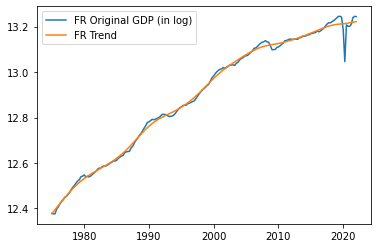

In [7]:
#仏国の場合
# フランスのGDPデータコード
france_gdp_code = 'CLVMNACSCAB1GQFR'  # フランスのGDPコード

# フランスのGDPデータをFREDから取得
france_gdp = web.DataReader(france_gdp_code, 'fred', start_date, end_date)
log_france_gdp = np.log(france_gdp)

# 四半期毎の実質GDPのパーセンテージ変化を計算
france_gdp_pct_change = france_gdp.pct_change(4)

# Hodrick-Prescottフィルターを適用して循環成分を抽出
france_cycle, france_trend = sm.tsa.filters.hpfilter(log_france_gdp, lamb=1600)

# 元の時系列データをプロット
plt.plot(log_france_gdp, label="FR Original GDP (in log)")

# トレンド成分をプロット
plt.plot(france_trend, label="FR Trend")

# 凡例を追加してプロットを表示
plt.legend()
plt.show()

In [8]:
# 1995年以降のデータにフィルタリング(日本のデータに合わせるため)
jp_cycle_filtered = japan_cycle[japan_cycle.index >= '1995-01-01']
uk_cycle_filtered = uk_cycle[uk_cycle.index >= '1995-01-01']
us_cycle_filtered = cycle[cycle.index >= '1995-01-01']
ge_cycle_filtered = germany_cycle[germany_cycle.index >= '1995-01-01']
fr_cycle_filtered = france_cycle[france_cycle.index >= '1995-01-01']
# データフレームの作成
df_list = [jp_cycle_filtered, uk_cycle_filtered, us_cycle_filtered, ge_cycle_filtered, fr_cycle_filtered]
# データフレームの結合
combined_df = pd.concat(df_list, axis=1)
# 列名の設定
combined_df.columns = ['JP', 'UK', 'US', 'GE', 'FR']
# データフレームの表示
combined_df.head()

,JP,UK,US,GE,FR
DATE,,,,,
1995-01-01,-0.009096,-0.010620,-0.000337,0.001553,0.001353
1995-04-01,-0.003601,-0.013232,-0.006185,0.005284,0.003189
1995-07-01,0.004234,-0.007648,-0.006737,0.003431,-0.000075
1995-10-01,0.003047,-0.005423,-0.009186,0.000048,-0.005369
1996-01-01,0.007567,-0.001595,-0.011124,-0.012055,-0.003158


In [9]:
#データの概要
combined_df.describe()


,JP,UK,US,GE,FR
count,109.000000,109.000000,109.000000,109.000000,109.000000
mean,0.000416,-0.000056,0.000014,0.000058,-0.000136
std,0.016222,0.021551,0.013779,0.017736,0.020274
min,-0.080087,-0.152126,-0.087124,-0.098196,-0.167357
25%,-0.008423,-0.007648,-0.005961,-0.006651,-0.005494
50%,0.001873,-0.000083,-0.000337,0.000048,-0.001966
75%,0.011358,0.009427,0.007742,0.011192,0.009731
max,0.029374,0.047787,0.023707,0.036700,0.034216


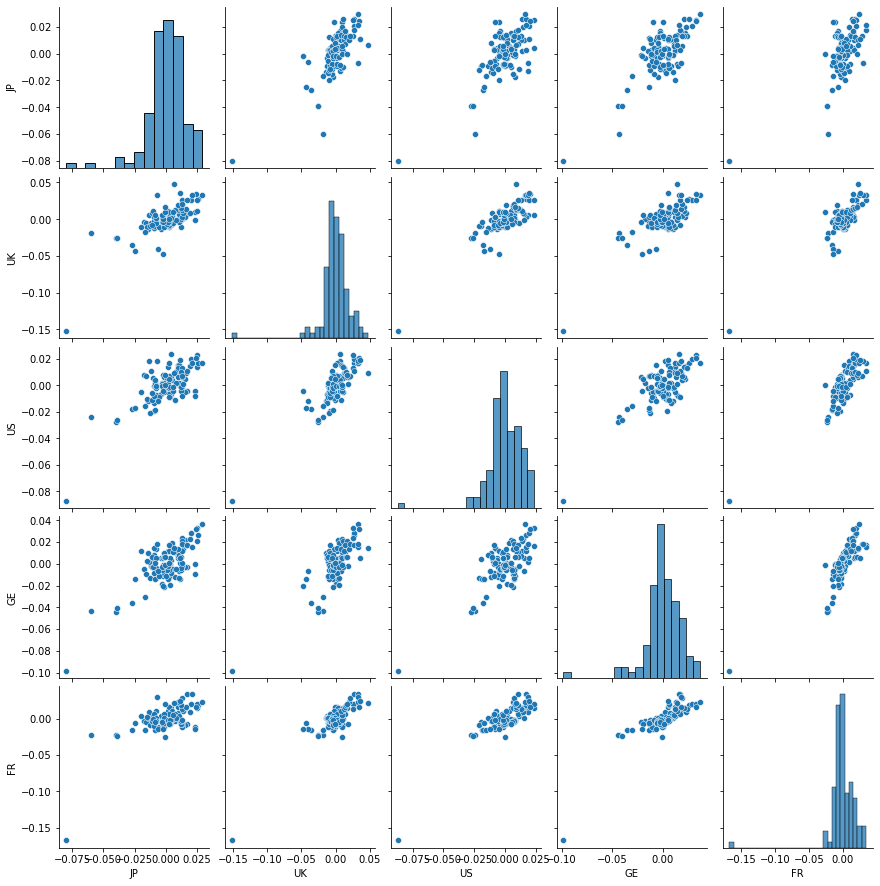

In [10]:
#相関関係
import seaborn as sns

# 散布図行列の作成
sns.pairplot(combined_df)
plt.show()

In [11]:
# データフレームの相関係数を計算
correlation_matrix = combined_df.corr()

# 相関係数の表示
print("相関係数:")
print(correlation_matrix)

相関係数:
          JP        UK        US        GE        FR
JP  1.000000  0.734764  0.728309  0.730678  0.658966
UK  0.734764  1.000000  0.833978  0.776237  0.859142
US  0.728309  0.833978  1.000000  0.746453  0.831596
GE  0.730678  0.776237  0.746453  1.000000  0.835616
FR  0.658966  0.859142  0.831596  0.835616  1.000000


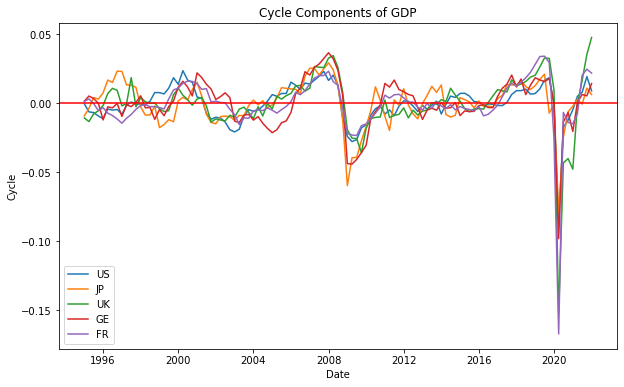

In [12]:
# Plot the cycle component
plt.figure(figsize=(10, 6))
plt.plot(us_cycle_filtered, label="US")
plt.plot(jp_cycle_filtered, label="JP")
plt.plot(uk_cycle_filtered, label="UK")
plt.plot(ge_cycle_filtered, label="GE")
plt.plot(fr_cycle_filtered, label="FR")
plt.axhline(0, color='red')
# Add labels and title
plt.title('Cycle Components of GDP')
plt.xlabel('Date')
plt.ylabel('Cycle')
plt.legend()
plt.show()

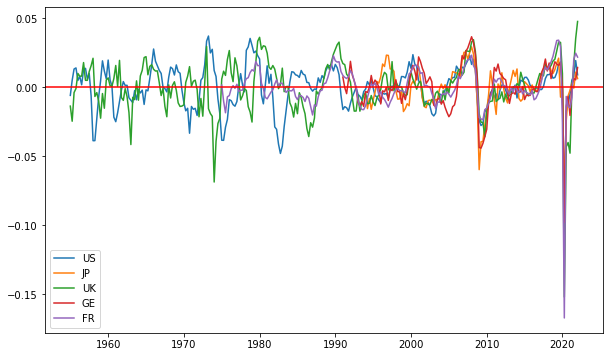

Cycle mean: 2.22691753513363e-13
Cycle standard deviation: 0.01538272676766542


In [13]:
# Plot the cycle component
plt.figure(figsize=(10, 6))
plt.plot(cycle, label="US")
plt.plot(japan_cycle, label="JP")
plt.plot(uk_cycle, label="UK")
plt.plot(germany_cycle, label="GE")
plt.plot(france_cycle, label="FR")
plt.axhline(0, color='red')
# Add a legend and show the plot
plt.legend()
plt.show()

cycle_mean = cycle.mean()
cycle_std = cycle.std()

print("Cycle mean:", cycle_mean)
print("Cycle standard deviation:", cycle_std)


In [14]:
#相関係数計算
correlation_coefficient = jp_cycle_filtered.corr(uk_cycle_filtered)
print("日本とイギリスの景気循環相関係数(1995年以降)")
print(correlation_coefficient)

日本とイギリスの景気循環相関係数(1995年以降)
0.7347643223701661


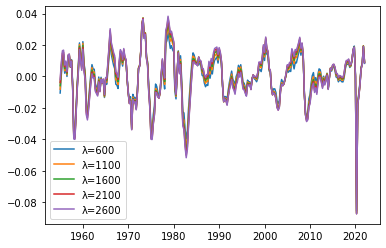

λに対する推定結果は頑健


In [15]:
#λごとで推定結果はどのように変化するのか？
# 米国のデータを使用
# λを500ごとに変えて5つデータを作成
cycle1, trend1 = sm.tsa.filters.hpfilter(log_gdp, lamb=600)
cycle2, trend2 = sm.tsa.filters.hpfilter(log_gdp, lamb=1100)
cycle3, trend3 = sm.tsa.filters.hpfilter(log_gdp, lamb=1600)
cycle4, trend4 = sm.tsa.filters.hpfilter(log_gdp, lamb=2100)
cycle5, trend5 = sm.tsa.filters.hpfilter(log_gdp, lamb=2600)
# Plot the cycle component
plt.plot(cycle1, label="λ=600")
plt.plot(cycle2, label="λ=1100")
plt.plot(cycle3, label="λ=1600")
plt.plot(cycle4, label="λ=2100")
plt.plot(cycle5, label="λ=2600")
# Add a legend and show the plot
plt.legend()
plt.show()
print("λに対する推定結果は頑健")